In [19]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# df = pd.read_csv('/content/drive/MyDrive/major_project/large/Insurance_Fraud_Detection/telematics_syn-032021.csv')
df = pd.read_csv('/content/drive/MyDrive/major_project/large/timepass/temp_tel.csv')
df.head(5)

,Duration,Insured.age,Insured.sex,Car.age,Marital,Car.use,Credit.score,Region,Annual.miles.drive,Years.noclaims,...,Left.turn.intensity10,Left.turn.intensity11,Left.turn.intensity12,Right.turn.intensity08,Right.turn.intensity09,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12,NB_Claim,AMT_Claim
0,366,45,Male,-1,Married,Commute,609,Urban,6213.71,25,...,1,0,0,3,1,0,0,0,1,5100.171753
1,182,44,Female,3,Married,Commute,575,Urban,12427.42,20,...,58,24,11,1099,615,219,101,40,1,883.554840
2,184,48,Female,6,Married,Commute,847,Urban,12427.42,14,...,0,0,0,0,0,0,0,0,0,0.000000
3,183,71,Male,6,Married,Private,842,Urban,6213.71,43,...,0,0,0,0,0,0,0,0,0,0.000000
4,183,84,Male,10,Married,Private,856,Urban,6213.71,65,...,2,0,0,325,111,18,4,2,0,0.000000


In [22]:
df.shape

(100000, 52)

In [23]:
df.isna().sum()

Duration                  0
Insured.age               0
Insured.sex               0
Car.age                   0
Marital                   0
Car.use                   0
Credit.score              0
Region                    0
Annual.miles.drive        0
Years.noclaims            0
Territory                 0
Annual.pct.driven         0
Total.miles.driven        0
Pct.drive.mon             0
Pct.drive.tue             0
Pct.drive.wed             0
Pct.drive.thr             0
Pct.drive.fri             0
Pct.drive.sat             0
Pct.drive.sun             0
Pct.drive.2hrs            0
Pct.drive.3hrs            0
Pct.drive.4hrs            0
Pct.drive.wkday           0
Pct.drive.wkend           0
Pct.drive.rush am         0
Pct.drive.rush pm         0
Avgdays.week              0
Accel.06miles             0
Accel.08miles             0
Accel.09miles             0
Accel.11miles             0
Accel.12miles             0
Accel.14miles             0
Brake.06miles             0
Brake.08miles       

In [24]:
df.NB_Claim.value_counts()

0    95728
1     4272
Name: NB_Claim, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
df['Insured.sex'] = le.fit_transform(df['Insured.sex'])
df['Marital'] = le.fit_transform(df['Marital'])
df['Car.use'] = le.fit_transform(df['Car.use'])
df['Region'] = le.fit_transform(df['Region'])

In [27]:
df.head(3)

,Duration,Insured.age,Insured.sex,Car.age,Marital,Car.use,Credit.score,Region,Annual.miles.drive,Years.noclaims,...,Left.turn.intensity10,Left.turn.intensity11,Left.turn.intensity12,Right.turn.intensity08,Right.turn.intensity09,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12,NB_Claim,AMT_Claim
0,366,45,1,-1,0,1,609,1,6213.71,25,...,1,0,0,3,1,0,0,0,1,5100.171753
1,182,44,0,3,0,1,575,1,12427.42,20,...,58,24,11,1099,615,219,101,40,1,883.554840
2,184,48,0,6,0,1,847,1,12427.42,14,...,0,0,0,0,0,0,0,0,0,0.000000


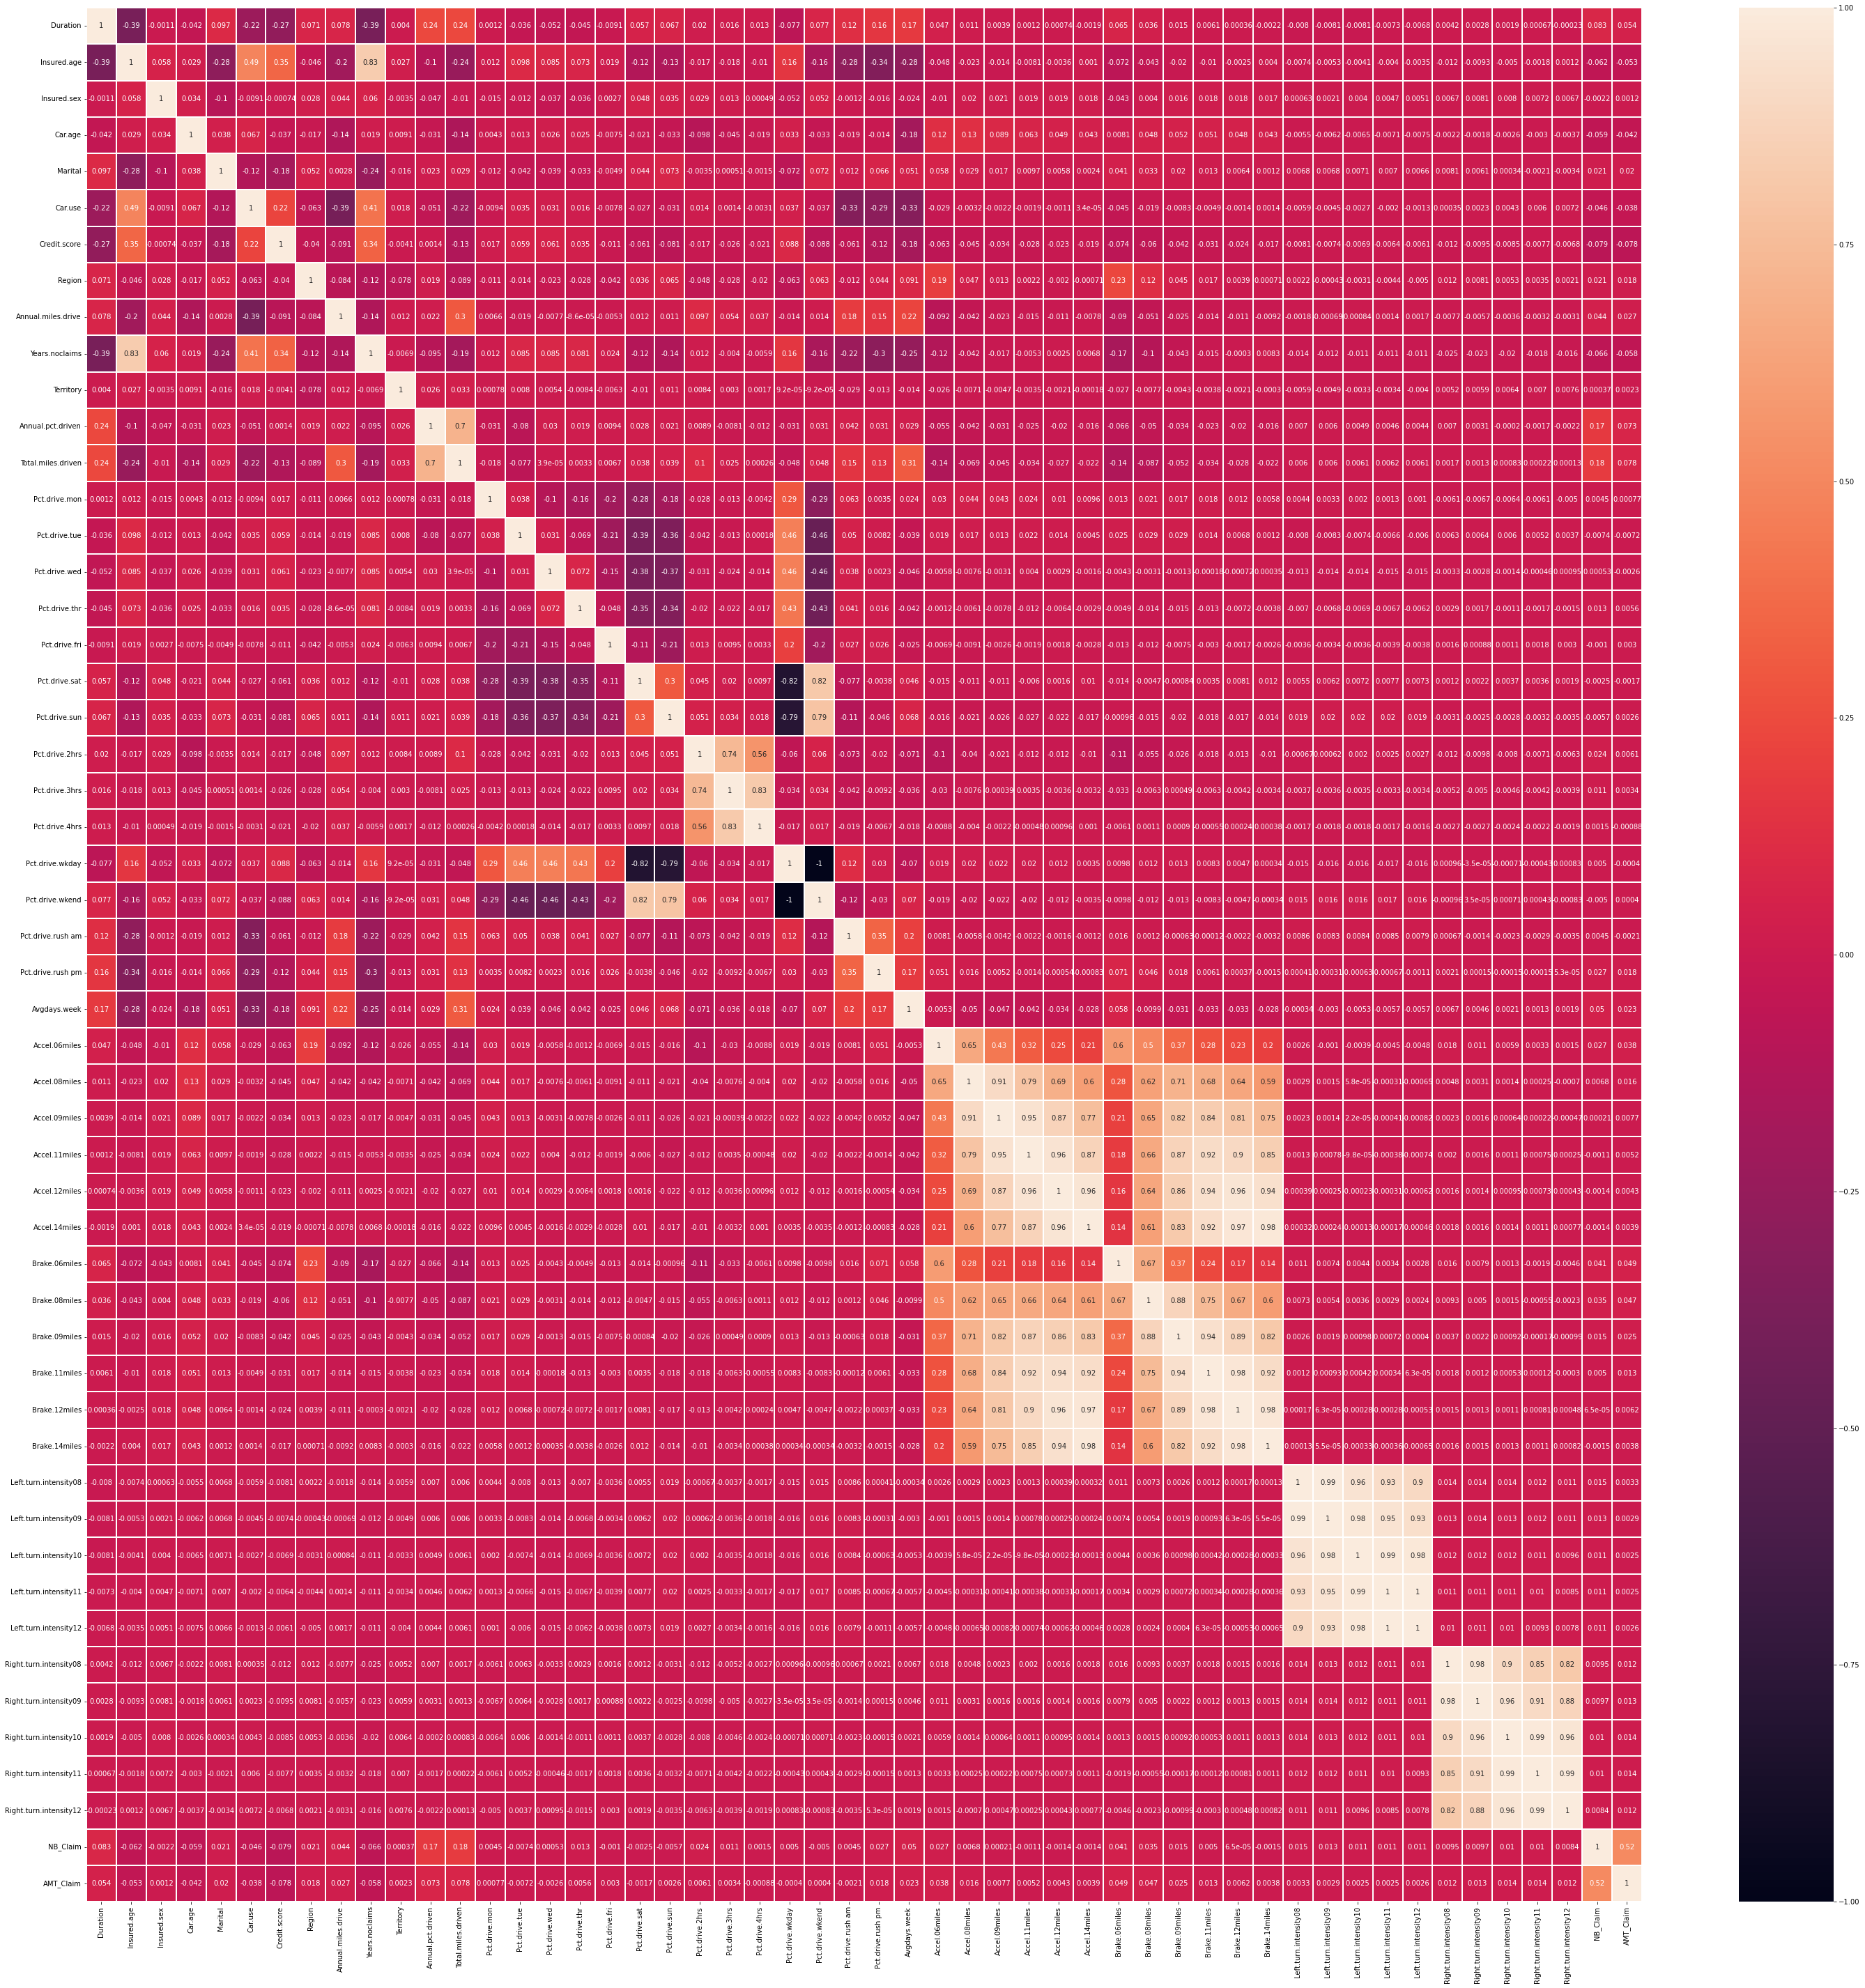

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize = (50, 50))
sns.heatmap(data = df.corr(), annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [29]:
corrs = df.corr()['NB_Claim']
columns = corrs[corrs > .001].index
corrs = corrs.filter(columns)
corrs.sort_values(ascending=False)

NB_Claim                  1.000000
AMT_Claim                 0.515198
Total.miles.driven        0.181478
Annual.pct.driven         0.171985
Duration                  0.082858
Avgdays.week              0.049732
Annual.miles.drive        0.043590
Brake.06miles             0.040644
Brake.08miles             0.034615
Pct.drive.rush pm         0.026586
Accel.06miles             0.026545
Pct.drive.2hrs            0.024174
Region                    0.021395
Marital                   0.020964
Left.turn.intensity08     0.014664
Brake.09miles             0.014620
Left.turn.intensity09     0.013420
Pct.drive.thr             0.013419
Pct.drive.3hrs            0.011303
Left.turn.intensity10     0.011179
Left.turn.intensity12     0.011089
Left.turn.intensity11     0.010892
Right.turn.intensity10    0.010437
Right.turn.intensity11    0.010195
Right.turn.intensity09    0.009687
Right.turn.intensity08    0.009481
Right.turn.intensity12    0.008442
Accel.08miles             0.006750
Brake.11miles       

In [30]:
df.columns

Index(['Duration', 'Insured.age', 'Insured.sex', 'Car.age', 'Marital',
       'Car.use', 'Credit.score', 'Region', 'Annual.miles.drive',
       'Years.noclaims', 'Territory', 'Annual.pct.driven',
       'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue', 'Pct.drive.wed',
       'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat', 'Pct.drive.sun',
       'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday',
       'Pct.drive.wkend', 'Pct.drive.rush am', 'Pct.drive.rush pm',
       'Avgdays.week', 'Accel.06miles', 'Accel.08miles', 'Accel.09miles',
       'Accel.11miles', 'Accel.12miles', 'Accel.14miles', 'Brake.06miles',
       'Brake.08miles', 'Brake.09miles', 'Brake.11miles', 'Brake.12miles',
       'Brake.14miles', 'Left.turn.intensity08', 'Left.turn.intensity09',
       'Left.turn.intensity10', 'Left.turn.intensity11',
       'Left.turn.intensity12', 'Right.turn.intensity08',
       'Right.turn.intensity09', 'Right.turn.intensity10',
       'Right.turn.intensity1

In [31]:
print(columns)

Index(['Duration', 'Marital', 'Region', 'Annual.miles.drive',
       'Annual.pct.driven', 'Total.miles.driven', 'Pct.drive.mon',
       'Pct.drive.thr', 'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs',
       'Pct.drive.wkday', 'Pct.drive.rush am', 'Pct.drive.rush pm',
       'Avgdays.week', 'Accel.06miles', 'Accel.08miles', 'Brake.06miles',
       'Brake.08miles', 'Brake.09miles', 'Brake.11miles',
       'Left.turn.intensity08', 'Left.turn.intensity09',
       'Left.turn.intensity10', 'Left.turn.intensity11',
       'Left.turn.intensity12', 'Right.turn.intensity08',
       'Right.turn.intensity09', 'Right.turn.intensity10',
       'Right.turn.intensity11', 'Right.turn.intensity12', 'NB_Claim',
       'AMT_Claim'],
      dtype='object')


# feat=df.columns.values
feat= ['Duration', 'Marital', 'Region', 'Annual.miles.drive',
       'Annual.pct.driven', 'Total.miles.driven', 'Pct.drive.mon',
       'Pct.drive.thr', 'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs',
       'Pct.drive.wkday', 'Pct.drive.rush am', 'Pct.drive.rush pm',
       'Avgdays.week', 'Accel.06miles', 'Accel.08miles', 'Accel.09miles',
       'Brake.06miles', 'Brake.08miles', 'Brake.09miles', 'Brake.11miles',
       'Left.turn.intensity08', 'Left.turn.intensity09',
       'Left.turn.intensity10', 'Left.turn.intensity11',
       'Left.turn.intensity12', 'Right.turn.intensity08',
       'Right.turn.intensity09', 'Right.turn.intensity10',
       'Right.turn.intensity11', 'Right.turn.intensity12', 'AMT_Claim']

In [32]:
# feat=df.columns.values
feat= ['AMT_Claim','Total.miles.driven','Annual.pct.driven','Duration','Region','Avgdays.week',\
       'Brake.06miles','Annual.miles.drive', 'Accel.06miles','Marital','Left.turn.intensity08','Right.turn.intensity10']

In [33]:
X = df[feat]
y = df.NB_Claim

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, stratify=y)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Model instance
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test accuracy of KNN is : 0.98376
[[23929     3]
 [  403   665]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     23932
           1       1.00      0.62      0.77      1068

    accuracy                           0.98     25000
   macro avg       0.99      0.81      0.88     25000
weighted avg       0.98      0.98      0.98     25000



In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)
np.bincount(y_train)

array([71796, 71796])

In [38]:
y_train.value_counts()

0    71796
1    71796
Name: NB_Claim, dtype: int64

In [ ]:
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    
    level0 = list()
    level0.append(('DT', DecisionTreeClassifier(max_depth=10, random_state=5)))
    level0.append(('RF', RandomForestClassifier(n_estimators=2000)))
    level0.append(('KNN', KNeighborsClassifier(5)))
    level0.append(('ADA', AdaBoostClassifier(n_estimators=500)))
    level0.append(('XGB', XGBClassifier(objective= 'binary:logistic', eval_metric='logloss')))
    level1 = LogisticRegression(solver='lbfgs', max_iter=5000) 


    # level0 = list()
    # level0.append(('DT', DecisionTreeClassifier()))
    # level0.append(('RF', RandomForestClassifier()))
    # #level0.append(('KNN', KNeighborsClassifier(5)))
    # #level0.append(('ADA', AdaBoostClassifier(n_estimators=500)))
    # level0.append(('XGB', XGBClassifier(objective= 'binary:logistic', eval_metric='logloss')))
    # level1 = LogisticRegression(multi_class='multinomial', solver='lbfgs') 
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['DT'] = DecisionTreeClassifier()
    models['RF'] = RandomForestClassifier()
    models['XGB'] = XGBClassifier()
    models['Stacking'] = get_stacking()
    return models

# get the models to evaluate
models = get_models()

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

>DT 0.9923 (0.0006)
>RF 0.9961 (0.0004)
>XGB 0.9755 (0.0011)


In [ ]:
#import pickle
# Save trained model to file
#pickle.dump(model, open("/content/drive/MyDrive/Insurance_Fraud_Detection/Insurance_Model/insurance_dd.pkl", "wb"))